# import and load data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
from my_imports import *

#importlib.reload(evcouplings)
import evcouplings
print(evcouplings.__file__)
from evcouplings.couplings import CouplingsModel
from evcouplings.mutate import predict_mutation_table, single_mutant_matrix

%matplotlib inline
from my_imports import *
import stanTools
import matplotlib.style as style
import plotMutationMatrix as pmm
import natureTools as nt
from mutTools import fasta_iter_py3, hamming
from constants import AA_LIST_ALPHABETICAL
aa_20 = AA_LIST_ALPHABETICAL[:20]

/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/evcouplings/__init__.py


In [2]:

# to use  my own stylimport matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams.update(mpl.rcParamsDefault)

avb_cols = {'pur':'#5B49B6', 
            'blu':'#52A4D9', 
            'tur':'#59C09D',
            'tea':'#B3EBAD',
            'yel': '#C3D64C',
            'gra':'#9B9B9D'}
avb_contrast_cols = {
    'p': '#C17EFF',
    'g': '#75C26A'
}
plt.style.use('/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/paper_style1.mplstyle')

# of nontoxic mutants in all concentrations 839
# of toxin mutants called toxic: 311
# of nontoxic mutants in all concentrations 855
# of toxin mutants called toxic: 781
len of mt_toxins: 310
len of ta_toxins 781
15
15
30
37


2012_load_data.py:636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muts_mt_wt_toxin['t_pos_pdb'] = df_muts_mt_wt_toxin.t_mut.str[1:-1].astype(int) +1
2012_load_data.py:737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr['at_mut'] = [at] * len(df_curr)


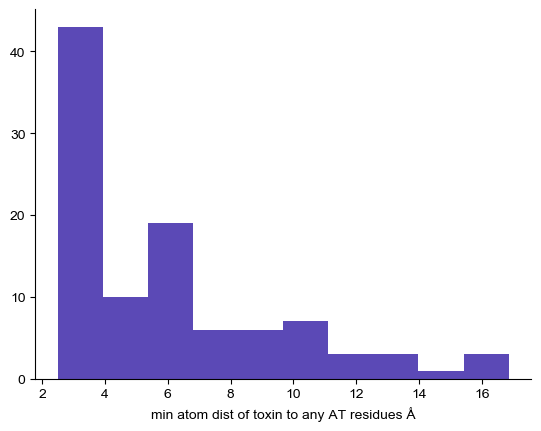

In [3]:
# load all the data in
%run -i 2012_load_data.py

In [4]:
# load ecs in
%run -i 2103_read_ec_files.py

added so many missing rows to df_longrange 736
added so many missing rows to df_longrange 729
added so many missing rows to df_longrange 744
added so many missing rows to df_longrange 752
added so many missing rows to df_longrange 752
added so many missing rows to df_longrange 744
added so many missing rows to df_longrange 806
added so many missing rows to df_longrange 744
added so many missing rows to df_longrange 751
added so many missing rows to df_longrange 810
1389.0


/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/natureTools.py:1466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['tp_inter'] = tp_inter
/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/natureTools.py:1467: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['tp_mono1'] = tp_mono1
/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/natureTools.py:1468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

1390.0
1197.0
1189.0
1140.0
1047.0
915.0
1410.0
1198.0
1410.0
1198.0
added so many missing rows to df_longrange 806
915.0


In [5]:
plot_out= '/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/pairedEnd/x51/2103_out/'


# ev mutation new data

In [19]:
complex_scan_dir = '/Users/davidding/Dropbox (HMS)/parESingleLibrary/ex54_coevolution/scan/'
fname = 'F7YBW7ur_b03_F7YBW8ur_b03_theta08_m80_f80.model'
c = CouplingsModel(complex_scan_dir+fname)


# Fig 5E

In [25]:
indir = './2004_out/processing/'

df_all_wt_t= pd.read_csv(indir + 'df_all_wt_t.csv', index_col ='aa_mut')

df_at = df_all_wt_t
df_at['aa_mut'] = df_at.index
df_at['aa_mut_ev'] = df_at['aa_mut'].apply(lambda t_mut: str(t_mut[0])+str(int(t_mut[1:-1])+ 1) + t_mut[-1])
df_at = df_at[['41_tc_nov2_mean_fit', '41_tc_nov2_neg_log_p_tail', 'aa_mut', 'aa_mut_ev']]
df_at = df_at.rename(columns={'41_tc_nov2_mean_fit': 'obs', '41_tc_nov2_neg_log_p_tail': 'nlpt'})



df_at['pred'] = df_at.aa_mut_ev.apply( lambda at_mut: nt.get_at_delta_hamiltonian(c, at_mut))

df_doubles_l_mt['at_pred'] = df_doubles_l_mt.apply(lambda r: df_at.loc[r.at_mut]['pred'], axis=1)

df_doubles_l_mt['at_mut_m1'] = df_doubles_l_mt['at_mut'].apply(
    lambda mut: str(mut[0])+str(int(mut[1:-1])+ 1) + mut[-1])
df_doubles_l_mt['t_mut_m1'] = df_doubles_l_mt['t_mut'].apply(
    lambda mut: str(mut[0])+str(int(mut[1:-1])+ 1) + mut[-1])

# add predictions
df_doubles_l_mt['pred'] = df_doubles_l_mt.apply(
    lambda r: nt.get_double_delta_hamiltonian(c, r.t_mut_m1, r.at_mut_m1), 
    axis=1
)

df_doubles_l_mt['pred_t_resc'] = df_doubles_l_mt['pred'] -df_doubles_l_mt['at_pred'] 


df_doubles_l_mt['at_t_mut'] = df_doubles_l_mt.at_mut +':'+df_doubles_l_mt.t_mut

df_resc_low_mt['at_t_mut'] = df_resc_low_mt.at_mut +':'+df_resc_low_mt.t_mut
df_doubles_l_mt['resc'] = df_doubles_l_mt.at_t_mut.isin(df_resc_low_mt.at_t_mut)

2103_read_ec_files.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_ec = df_doubles_l_mt.merge(df_ec_03_inters, how = 'left',left_on=['at_pos_m1', 't_pos_m1'], right_on = ['j', 'i'])
2103_read_ec_files.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dic_at_to_pair = pickle.load(open('/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/pairedEnd/x51//2009_out/ec/pdb/at_t_pairs.p', 'rb'))
2103_read_ec_files.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

SpearmanrResult(correlation=0.07742796327204864, pvalue=0.00019348247379766075)
(0.08639232690934273, 3.1761088341072253e-05)


/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


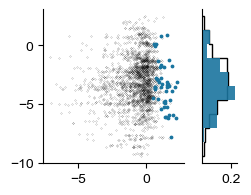

In [27]:
df_plot = df_doubles_l_mt.loc[df_doubles_l_mt.at_mut.isin(del_at_low05)]

plt.figure(figsize=(2.5,2))

gs = gridspec.GridSpec(1,2, width_ratios=(4,1))#, wspace=0.5, hspace=0.5)
ax_scat = plt.subplot(gs[0])
df_resc = df_plot.loc[df_plot.resc]
df_non_resc = df_plot.loc[~df_plot.resc]


ax_scat.scatter(df_non_resc.mean_fit, df_non_resc.pred_t_resc, color='black', s=0.01)
ax_scat.scatter(df_resc.mean_fit, df_resc.pred_t_resc, 
                color='#1a759f',
                s=3)

df_plot_no_nan = df_plot.dropna()
print(spearmanr(df_plot_no_nan.mean_fit, df_plot_no_nan.pred_t_resc))
print(pearsonr(df_plot_no_nan.mean_fit, df_plot_no_nan.pred_t_resc))

ax_hist =plt.subplot(gs[1])


n, bins, patches = ax_hist.hist(df_non_resc.pred_t_resc, color='black', 
                                alpha=1,              
                                histtype='step',
                                density=True, orientation='horizontal')
ax_hist.hist(df_resc.pred_t_resc, color='#1a759f',
             alpha=0.9, 
             histtype='stepfilled',
             density=True, orientation='horizontal', bins=bins)
ax_hist.set_yticks([])
ax_hist.set_xticks([0.2])
plt.savefig(plot_out + 'all_del_at_preds_l_mt.svg', format='svg')
plt.show()

# fig suppl evmutation predictions

# nan dropped : 48
# nan dropped : 48
# nan dropped : 48
# nan dropped : 48
# nan dropped : 48
# nan dropped : 48
# nan dropped : 48
# nan dropped : 48
# nan dropped : 48


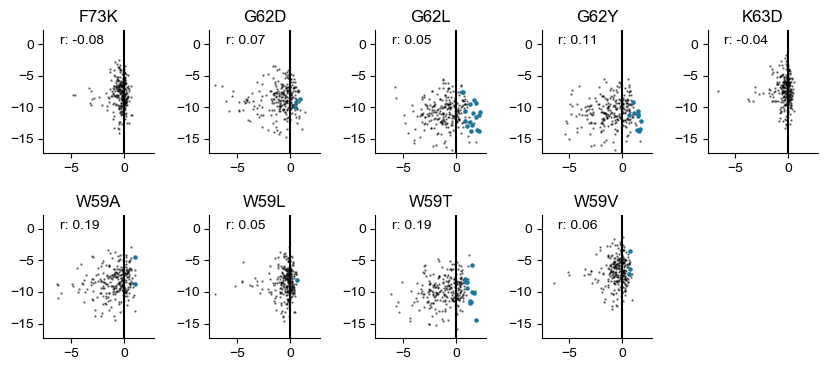

In [28]:

at_muts_plot = del_at_low05

#df_z=df_doubles_l_mt
col_resc = '#1a759f'


n_cols = int(np.ceil(np.sqrt(len(at_muts_plot))))
fig = plt.figure(figsize=(5 * 2, 2 * 2))
gs = gridspec.GridSpec(2, 5, wspace=0.5, hspace=0.5)

x_min = np.min(np.min(df_doubles_l_mt['mean_fit'])) - 0.5
x_max = np.max(np.max(df_doubles_l_mt['mean_fit'])) + 0.5

y_min = np.min(np.min(df_doubles_l_mt['pred'])) - 0.5
y_max = np.max(np.max(df_doubles_l_mt['pred'])) + 0.5

i = 0
for at_mut in at_muts_plot:
    
    df_z = df_doubles_l_mt.loc[df_doubles_l_mt.at_mut == at_mut]
    
    ax = plt.subplot(gs[i])

    x_col = 'mean_fit'
    y_col = 'pred'
    
    

    
    ax.scatter(df_z[x_col], df_z[y_col], s=0.5, alpha=0.5, c='black')
    
    # get rescuing muts
    df_z_resc = df_z.loc[df_z.resc]
    if len(df_z_resc) != 0:
        ax.scatter(df_z_resc[x_col], df_z_resc[y_col], s=5, c=col_resc)

    
    ax.axvline(0, color='black')
    df_corr = df_z[[x_col, y_col]].dropna()
    print('# nan dropped :', len(df_z) - len(df_corr))
    # sns.kdeplot(df_corr[x_col], df_corr[y_col], ax=ax, linewidths=0.5)

    spearman_corr = spearmanr(df_corr[x_col], df_corr[y_col])[0]
    pearson_corr = pearsonr(df_corr[x_col], df_corr[y_col])[0]
    ax.text(-6, 0, 'r: {:.2f}'.format(spearman_corr))#'spe: {:.2f}, pea: {:.2f}'.format(spearman_corr, pearson_corr))
    # ax.set_title(at_mut +' spear: {:.2f}, pears: {:.2f}'.format(spearman_corr, pearson_corr))
    #if i % n_cols == 0:
    #    ax.set_ylabel('prediction')
    #if int(np.ceil((i + 1) / n_cols)) == n_cols:
    #    ax.set_xlabel('observed')
    plt.title(at_mut)  # + str(i) +','+ str(n_cols))
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])

    i += 1
plt.savefig(plot_out + 'evcouplings_prediction_all_del.svg', format='svg')
plt.show()

# VAE predictions of mutations

In [29]:
fin = '/Users/davidding/Dropbox (HMS)/parESingleLibrary/ex60_benchmarking/parEparD_Laub2015_vae_preds_singles_doubles.csv'

mut_to_vae_ens={}
for l in open(fin, 'r'):

    vals = l.split(',')
    if vals[0]=='mutant':
        continue
    # the double mutants are separated by ',' so need to check
    if vals[1].startswith('at') or vals[1].startswith('t'):
        muts = vals[0] +'_'+vals[1]
        fit = vals[2]
    else:
        muts = vals[0]
        fit = vals[1]
    mut_to_vae_ens[muts] = fit
    
df_vae = pd.DataFrame.from_dict(mut_to_vae_ens, orient='index')

df_vae['at_mut'] = df_vae.apply(
    lambda r: r.name.split('_')[-1].split(':')[1] if r.name.split('_')[-1].startswith('at') else -1,axis=1)

df_vae['t_mut'] = df_vae.apply(
    lambda r: r.name.split('_')[0].split(':')[1] if r.name.split('_')[0].startswith('t') else -1,axis=1)

df_vae = df_vae.rename(columns={0:'fit_vae'})

In [30]:
#merging AT observations and predictions
df_vae_at = df_vae.loc[df_vae.t_mut ==-1]
#df_vae_at
df_merge_at_vae = df_all_at_lib.merge(df_vae_at, left_index=True, right_on = 'at_mut')

# merging toxin obs and pred
df_vae_t = df_vae.loc[df_vae.at_mut==-1]
df_vae_t
# merging in singles
df_merge_t_vae = df_all_mcs_toxic.merge(df_vae_t, left_index=True, right_on='t_mut')

# to get predictions for all toxin singles vs all antitoxin doubles
idxs = df_muts.loc[(df_muts.t_mut != 'wtT') & 
                   (df_muts.at_mut != 'wtAT')
                     & (df_muts.at_mut != '-AT') &
                  (df_muts.t_mut.str[-1] !='_') &
                   (df_muts.at_mut.str[-1] !='_')
                  ].index
df_muts_doubles = df_muts.iloc[idxs]

# add the cols required for 
df_muts_doubles['at_mut_m1'] = df_muts_doubles['at_mut'].apply(
    lambda mut: str(mut[0])+str(int(mut[1:-1])+ 1) + mut[-1])
df_muts_doubles['t_mut_m1'] = df_muts_doubles['t_mut'].apply(
    lambda mut: str(mut[0])+str(int(mut[1:-1])+ 1) + mut[-1])

#doubles
df_muts_doubles_vae = df_muts_doubles.merge(df_vae, 
                                            left_on=['t_mut', 'at_mut'], 
                                            right_on=['t_mut', 'at_mut'])

# only most toxic toxins
df_muts_doubles_vae_mt = df_muts_doubles_vae.loc[df_muts_doubles_vae.t_mut.isin(mt_toxins)]


df_muts_doubles_vae_mt['at_t_mut'] = df_muts_doubles_vae_mt.at_mut +':'+df_muts_doubles_vae_mt.t_mut

df_resc_low_mt['at_t_mut'] = df_resc_low_mt.at_mut +':'+df_resc_low_mt.t_mut
df_muts_doubles_vae_mt['resc'] = df_muts_doubles_vae_mt.at_t_mut.isin(df_resc_low_mt.at_t_mut)

2103_read_ec_files.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_tups = list(zip(df_all_coev.j, ['A'] * len(df_all_coev), df_all_coev.i, ['D'] * len(df_all_coev)))
2103_read_ec_files.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_wt_pos_list = set(df_all_coev.A_j + (df_all_coev.j -1).astype(str))
2103_read_ec_files.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [31]:
df_doubles_l_mt_vae = df_doubles_l_mt.merge(df_vae, 
                                            left_on=['t_mut', 'at_mut'], 
                                            right_on=['t_mut', 'at_mut'])

# nan dropped : 0
# nan dropped : 0
# nan dropped : 0
# nan dropped : 0
# nan dropped : 0
# nan dropped : 0
# nan dropped : 0
# nan dropped : 0
# nan dropped : 0


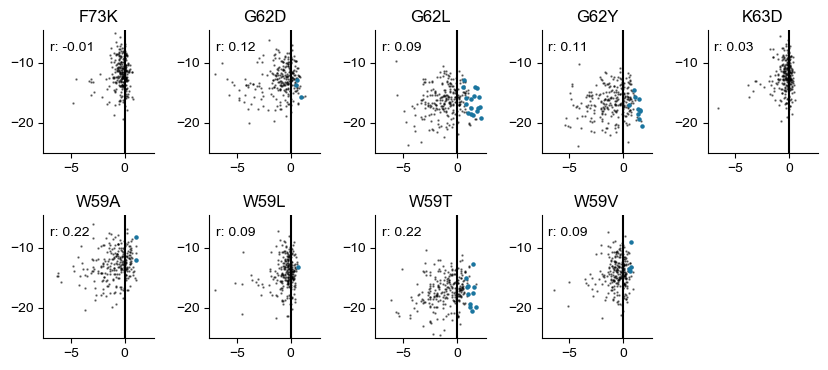

In [32]:
at_muts_plot = del_at_low05

x_col_plot = 'mean_fit'
y_col_plot = 'fit_vae'
df_plot = df_doubles_l_mt_vae

col_resc = '#1a759f'


n_cols = int(np.ceil(np.sqrt(len(at_muts_plot))))
fig = plt.figure(figsize=(5 * 2, 2 * 2))
gs = gridspec.GridSpec(2,5, wspace=0.5, hspace=0.5)

x_min = np.min(np.min(df_plot[x_col_plot])) - 0.5
x_max = np.max(np.max(df_plot[x_col_plot])) + 0.5

y_min = np.min(np.min(df_plot[y_col_plot].astype(float))) - 0.5
y_max = np.max(np.max(df_plot[y_col_plot].astype(float))) + 0.5
i = 0
for at_mut in at_muts_plot:
    
    df_z = df_plot.loc[df_plot.at_mut == at_mut]
    
    ax = plt.subplot(gs[i])

    x_col = x_col_plot
    y_col = y_col_plot
    ax.scatter(df_z[x_col], df_z[y_col].astype(float), s=0.5, alpha=0.5, c='black')
    # get rescuing muts
    df_z_resc = df_z.loc[df_z.resc]
    #print(df_z_resc)
    #print(df_z_resc[x_col])
    #print(df_z_resc[y_col])
    if len(df_z_resc) != 0:
        ax.scatter(df_z_resc[x_col], df_z_resc[y_col].astype(float), s=5, c=col_resc)
    
    df_corr = df_z[[x_col, y_col]].astype(float).dropna()
    print('# nan dropped :', len(df_z) - len(df_corr))
    # sns.kdeplot(df_corr[x_col], df_corr[y_col], ax=ax, linewidths=0.5)

    spearman_corr = spearmanr(df_corr[x_col], df_corr[y_col])[0]
    pearson_corr = pearsonr(df_corr[x_col], df_corr[y_col])[0]
    ax.text(-7, -8, 'r: {:.2f}'.format(spearman_corr))
    ax.axvline(0, color='black')
    # ax.set_title(at_mut +' spear: {:.2f}, pears: {:.2f}'.format(spearman_corr, pearson_corr))
    #if i % n_cols == 0:
    #    ax.set_ylabel('prediction')
    #if int(np.ceil((i + 1) / n_cols)) == n_cols:
    #    ax.set_xlabel('observed')
    plt.title(at_mut)  # + str(i) +','+ str(n_cols))
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])

    i += 1
plt.savefig(plot_out + 'vae_preds_rel_del_at_low.svg', format='svg')
plt.show()